Q1) (40 points) Write a Python script to perform the tasks in Q1 and Q3 from homework assignment 3 using numpy. Your program should accept the path to the file to read (example: C:\Documents\random.txt). Don’t submit the provided input file (random.txt) with your notebook.

FROM HW3
Q1) (40 points) Write a Python script to read the given text file called random.txt. The text file contains 1,000 random numbers collected from 5 different methods to generate random numbers. Each method generated 1,000 numbers. The first line is the header contains the name of the 5 methods used. Starting from the second line, every line is 5 random values, separated by a comma, come from the 5 methods. Therefore, each column in the text file is the 1,000 numbers coming from one method. Your program needs to read the file and calculate the summary statistics for each method (column). The summary statistics include (in order): max, min, mean, standard deviation, median, percentile 75, percentile 25. You have to write your own functions to calculate the above statistics. No built-in function can be used. Your program must output the results (either on screen or a text file) in a neat way and the statistics rounded to 2 decimal points. Here is an example of a neat output MethodA MethodB MethodC Max 9 Min 0 Mean . . . . . ...... ...... Percentile 25 . . . . .

Q3) (25 points) Write a python program to scale the numbers in random.txt for each method to integers in [0, 9] and then count the number of occurrence of each integer in the range [0, 9]. To scale the random number x use the formula round(9*(x - min)/(max - min)). Print out the frequencies of the range [0, 9] of each method on the screen. An example of a neat output is MethodA: 88 97 91 110 105 104 115 88 100 102 MethodB: 2 10 61 189 295 263 126 44 9 1 . MethodE: 64 119 123 120 98 115 106 100 107 48

Enter path to the file you want to search: /Users/desiree/Desktop/random(1).txt
 	methodA	methodB	methodC	methodD	methodE	

Max	9.0	15.84	15.11	20.48	9.0	



Min	0.0	-5.16	0.52	-10.87	0.0	



Mean	4.57	4.98	3.11	4.69	4.32	



St Dev	2.82	3.03	1.71	4.51	2.61	



Median	5.0	4.88	2.72	4.65	4.24	



P75	7.0	6.92	3.81	7.6	6.57	



P25	2.0	2.91	1.92	1.57	2.09	



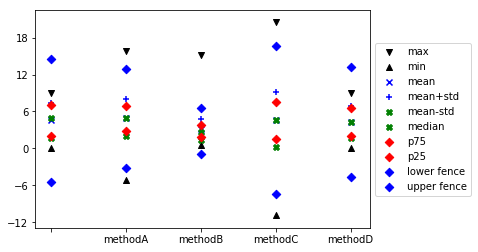

In [394]:
import numpy as np
import matplotlib.pyplot as plt
import math

def fences(data):
    #insert lower fence
    data=np.insert(data, 9, np.array((0,0,0,0,0)), 0)
    for x in range(data[9].shape[0]):
        data[9][x] = (float(data[8][x])-1.5*(float(data[7][x])-float(data[8][x])))
    #insert upper fence
    data=np.insert(data, 10, np.array((0,0,0,0,0)), 0)
    for x in range(data[10].shape[0]):
        data[10][x] = (float(data[7][x])+1.5*(float(data[7][x])-float(data[8][x])))
    return data

def Std(data):
    #insert mean+std
    data=np.insert(data, 3, np.array((0,0,0,0,0)), 0)
    for x in range(data[3].shape[0]):
        data[3][x]= (float(data[2][x])+float(data[4][x]))
    #insert mean-std
    data=np.insert(data, 4, np.array((0,0,0,0,0)), 0)   
    for x in range(data[4].shape[0]):
        data[4][x]= (float(data[2][x])-float(data[5][x]))
    return data   

def p25_value(array):
    sorted_array = np.array([])
    t=np.copy(array)
    while t.size!=0:
        largest=max_value(t)
        z=np.where(t==largest)
        sorted_array=np.append(sorted_array,largest)
        t=np.delete(t, z[0][0])
    value= round((sorted_array[749]+sorted_array[750])/2.0,2)  
    return value

def p75_value(array):
    sorted_array = np.array([])
    x=np.copy(array)
    while x.size!=0:
        largest=max_value(x)
        z=np.where(x==largest)
        sorted_array=np.append(sorted_array,largest)
        x=np.delete(x, z[0][0])
    value= round((sorted_array[249]+sorted_array[250])/2.0,2)  
    return value

def median_value(array):
    sorted_array = np.array([])
    y=np.copy(array)
    while y.size!=0:
        largest=max_value(y)
        z=np.where(y==largest)
        sorted_array=np.append(sorted_array,largest)
        y=np.delete(y, z[0][0])
    value=round((sorted_array[499]+sorted_array[500])/2.0,2)  
    return value

def stdev_value(array, mean):
    num_=0
    loops=0 
    while loops < array.size:
        num_+= (array[loops]-mean)**2
        loops+=1
    stdev = round(math.sqrt(num_/array.size),2)
    return stdev

def mean_value(array):
    sum_=0
    loops=array.size  
    while loops > 0:
        sum_+= array[loops-1]
        loops-=1
    mean = sum_/array.size
    return mean

def min_value(array):
    smallest=array[0]
    z=np.where(array<smallest)  
    while z[0].size:
        smallest = array[z[0][0]]
        z=np.where(array<smallest)
    smallest_rd = round(smallest,2)
    return smallest_rd

def max_value(array):
    largest=array[0]
    z=np.where(array>largest)  
    while z[0].size:
        largest = array[z[0][0]]
        z=np.where(array>largest)
    return largest
    

def stat_array(array):
    new_array=np.zeros((7,1))
    rd_max = round(max_value(array),2)
    new_array[0]=rd_max
    new_array[1]=min_value(array)
    rd_mean = round(mean_value(array),2)
    new_array[2]=rd_mean
    new_array[3]=stdev_value(array, new_array[2])
    new_array[4]=median_value(array)
    new_array[5]=p75_value(array)
    new_array[6]=p25_value(array)
    return new_array

# userFile = input("Enter path to the file you want to search: ")
userFile = input("Enter path to the file you want to search: ")
#readFile = open(userFile,"r+")

a, b, c, d, e=np.loadtxt(userFile, "float", delimiter=',', usecols=(0,1,2,3,4), unpack=True, skiprows=1)
methods = np.stack((a,b, c, d, e))
headers = np.loadtxt(userFile, "U10", delimiter=',')
headers = np.array(headers[0], dtype='U10')
stat_labels = np.array(["Max", "Min", "Mean", "St Dev", "Median", "P75", "P25"])
i=1
data=stat_array(methods[0])
while i<methods.shape[0]:
    data=np.column_stack((data, stat_array(methods[i])))
    i+=1
    
j=0
headers = np.insert(headers, 0, " ")
for x in headers:
    print(x, end='\t')
while j < data.shape[0]:
    print('\n')
    print(stat_labels[j], end='\t')
    
    for x in data[j]:
        print(x, end='\t')
        
    print("\n")        
    j+=1

data = Std(data)
data = fences(data)
data = np.delete(data, 5, 0)
    
fig, ax = plt.subplots()
markers = ['v', '^', 'x', '+', 'X', 'X', 'D', 'D', 'D', 'D']
colors = ['k', 'k', 'b', 'b', 'g', 'g','r', 'r', 'b', 'b']
lines=[]
for i in range(5):
    x=headers[i]
    for j in range(10):
        y=round(data[j][i],2) 
        lines.append(ax.scatter(x=x, y=y, marker=markers[j], color=colors[j]))
    
ax.legend(lines, ("max", "min", "mean", "mean+std", "mean-std","median", "p75", "p25", "lower fence", "upper fence"),loc='center left', bbox_to_anchor=(1, 0.5))

ax.yaxis.set_major_locator(plt.MaxNLocator(6))
#readFile.close()

Q2) (60 points) In this question we will be analyzing the Behavioral Risk Factor Surveillance System (BRFSS) weight vs. height data. The data can be found in the fixed-width ASCII file called CDBRFS08.ASC.gz. For this analysis, we are interested in five (5) pieces of data: age, current weight (cw), weight a year ago (waya), height, and gender. Please refer to the guideline of the given dataset at https://www.cdc.gov/brfss/annual_data/2008/pdf/codebook08.pdf. Based on the guideline, these data can be found in the following columns: age (101-102), current weight (119-122), weight a year ago (127- 130), height (123-126), and gender (143,143).
Your program should accept the path to the file to read (example: C:\Documents\CDBRFS08.ASC.gz). Don’t submit the provided input file (CDBRFS08.ASC.gz) with your notebook.
Use the following line code to open the file as zipped file: gzip.open(yourFile, ‘rt’). Where ‘rt’ is used to open the file and read it as a text file. Import gzip to be able to use the command.
Create a numby array of five (5) columns to maintain the data.
Clean the data by removing any invalid or missing entry. Refer to the guideline for more information about the invalid/missing data. Delete all rows contain any invalid/missing data.
For example: The only valid entries for cw are the values 50-0999 and 9000-9998.
Convert weights to kg (lb/2.2) and round it up to 1 decimal point. Convert the height to centimeters (feet*30.48 + inches*2.54) and round it down to the integer number (<=0.5 truncate, otherwise round the fraction up).
  
a) (10 points) Your final cleaned/converted array will have 385,974 entries/rows. Here are the first 15 rows of the array for your reference. Print same information.
b) (10 points) Produce summary statistics for cw, waya, and height (mean, standard deviation, range, and median). Round the final answer to two (2) decimal places.
 Sample output: cw:
mean: 79.06 waya:
mean: 79.8 height:
mean: 169.01
std: 19.51 std: 20.58 std: 10.39
range: 280.0 range: 319.6 range: 175.0
median: 77.3 median: 77.3 median: 168.0
c) (5 points) How many entries are females younger (<) than 40? Sample output: Number of females under 40: xxxx
d) (5 points) How many male is within 1 std (<=) in height from the mean of the entire set and from the mean of male entries?
Sample output:
Number of males within 1 std in height from the mean of entire set: xxxxx Number of males within 1 std in height from the mean of males: xxxxx
e) (5 points) How many outlier entries we have for waya for females?
Sample output: Number of outlier female entries in waya: xxxxx
f) (5 points) Find the coefficient of variation for cw.
Sample output: Coefficient variation (CV) for cw: xx.xx%
g) (5 points) Which group has less variation in cw, male or female? Why? Support your answer with numbers.
Sample output: female/male group has less variation Print out the numbers you used to conclude.

h)
i)
(5 points) Do males tend to gain more weight when they are older than (>) 40 compared to those who are younger? Use cw to find out. Support your answer with numbers.
Sample output: yes/no. Because ...... print out the numbers you used to conclude.
(10 points) Define weight change (delta_w) = cw – waya. Calculate correlation between delta_w and the following variables, and determine which one is most correlated (regardless of the sign of correlation) with delta_w:
a) cw, b) waya, c) height, and d) age.
Sample output: the most correlated variable is x because ...... here are the numbers Corr. Coef. delta and cw: x
Corr. Coef delta and waya: x Corr. Coef. delta and height: x Corr. Coef. delta and age: x

In [392]:
import numpy as np
import gzip

infile = gzip.open('C:\Documents\CDBRFS08.ASC.gz', 'rt')

age = []; cw = []; waya = []; ht = []; gender = [];
data = []
for line in infile:
    age += [line[100:102]]
    cw += [line[118:122]]
    ht += [line[122:126]]
    waya += [line[126:130]]
    gender += [line[142]]

    
        
data = list(zip(age, cw, waya, ht, gender)) #put alltogether

npdata = np.array(data) #create a Numpy array

print(npdata.size)
delete = 1;
mark_delete = []
for x in range(npdata.shape[0]):
    i=0
    for y in npdata[x]:
        if y == None or np.char.isnumeric(y)==False or (int(y)/7 == 1 or int(y)/7== 11 or int(y)/7 == 111 or int(y)/7 ==1111) or (int(y)/9 == 1 or int(y)/9== 11 or int(y)/9 == 111 or int(y)/9 ==1111):
            delete = 0
        
    if delete == 0:
        mark_delete.append(x)
       # npdata=np.delete(npdata, x, 0)
    delete = 1
npdata=np.delete(npdata, mark_delete, 0)
npdata = npdata.astype(float) 
delete = 0
marked_delete = []
for x in range(npdata.shape[0]):
    if 18<=npdata[x][0] <=99:
        delete = 1
        new_value = None
    if 50<npdata[x][1]<999:
        delete = 1
        new_value = npdata[x][1]/2.2
        if len(str(new_value))== 1:
            new_value_str = '900'+ str(int(new_value))
            
        elif len(str(int(new_value)))== 2:
            new_value_str = '90'+ str(int(new_value))
        else:
            new_value_str = '9'+ str(int(new_value))    
        npdata[x][1] = float(new_value_str)
    
    if 50< npdata[x][2] <999:
        delete = 1
        new_value = npdata[x][2]/2.2
        if len(str(new_value))== 1:
            new_value_str = '900'+ str(new_value)
            
        elif len(str(int(new_value)))== 2:
            new_value_str = '90'+ str(new_value)
        else:
            new_value_str = '9'+ str(new_value)    
        npdata[x][2] = float(new_value_str)
        
    if 200< npdata[x][3] <711:
        delete = 1
        t=str(npdata[x][3])
        
        y=np.trunc(float(t[1])*30.48 + float(t[2:4])*2.54 + 0.5)
        new_value=y
        if len(str(new_value))== 1:
            new_value_str = '900'+ str(new_value)
            
        elif len(str(new_value))== 2:
            new_value_str = '90'+ str(new_value)
        else:
            new_value_str = '9'+ str(new_value)    
        npdata[x][3] = new_value_str
    if npdata[x][4] == 1 or npdata[x][4] == 2:
        delete = 1
    if delete == 0:
        marked_delete.append(x)
    delete = 0
npdata=np.delete(npdata, marked_delete, 0)
print(npdata.size)

2072545
1904535


In [51]:
import numpy as np
import gzip

infile = gzip.open('/Users/desiree/Documents/CDBRFS08.ASC', 'rt')

age = []; cw = []; waya = []; ht = []; gender = [];
data = []
for line in infile:
    age += [line[100:102]]
    cw += [line[118:122]]
    waya += [line[126:130]]
    ht += [line[122:126]]
    gender += [line[142]]

    
        
data = list(zip(age, cw, waya, ht, gender)) #put alltogether

npdata = np.array(data) #create a Numpy array
#npdata[~np.isnan(npdata).any(axis=1)]
print(npdata.size)
npdata = npdata[~np.any(npdata == "    ", axis=1)]
npdata = npdata.astype(int)
npdata = npdata[~np.any(npdata == 7777, axis=1)]
npdata = npdata[~np.any(npdata == 9999, axis=1)]
npdata = npdata[~np.any(npdata == 7, axis=1)]
npdata = npdata[~np.any(npdata == 9, axis=1)]

def my_func(a):
    b= a/2.2
    print(b)
    return b
    
    
    
data = np.apply_along_axis(my_func, 1, npdata[...,1:2])
np.place(npdata, npdata[,1], [data])
#npdata = npdata[~np.any(npdata[...,:1]<18, axis=1)]
#npdata = npdata[~np.any(npdata[...,:1]>99, axis=1)]
#npdata = npdata[~np.any(npdata[...,4:]<1, axis=1)]
#npdata = npdata[~np.any(npdata[...,3:4]>711, axis=1)]
#mask= npdata == None
#print (mask)
#npdata= np.delete(npdata, mask==True,0)
print(npdata.size)
print(npdata)

SyntaxError: invalid syntax (<ipython-input-51-4c5e5fd246c5>, line 37)